# EXERCISE 1.1: SIMPLE FUNCTION

*This is the programming assignment for **week 2** of the Stanford University **Machine Learning** course on coursera.org*

## Before you start

Read the original assignment document (ex1.pdf), this will guide you through the assignment.
Note that the PDF is the orginal document for the course which assumes you will be implementing the assignment in Matlab/Octave. 

Do not change any code in this nodebook file; your job is to implement the following:
- Task 1: warmupExcercise.py
- Task 2: plotData.py
- Task 3: computeCost.py
- Task 4: gradientDescent.py

Variable conventions:
- ``m`` : number of training examples (rows in the dataset) - scalar value
- ``n`` : number of features in the data (columns in the dataset, excluding the column with result values) - scalar value
- ``X_data`` : m x n matrix representing all input data - 2D array
- ``X`` : m x (n+1) design matrix, basically X_data preprended with a column of ones - 2D array
- ``y`` : m element result vector - 1D array
- ``theta`` : n+1 element fitting parameter vector - 1D array

In [1]:
# 3rd party libraries
import numpy as np
import matplotlib.pyplot as plt

# user defined functions; you will be implementing these 
from warmupExercise import warmupExercise     # task 1 
from plotData import plotData                 # task 2
from computeCost import computeCost           # task 3
from gradientDescent import gradientDescent   # task 4

## Warmup exercise

<u>Task 1</u>: implement warmupExcercise.py

In [2]:
# task 1: implement warmupExercise.py
I5 = warmupExercise()
I5 # print the matrix

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# EXERCISE 1.2: LINEAR REGRESSION WITH ONE VARIABLE

## Part 1: Reading and plotting data

<u>Task 2</u>: implement plotData.py

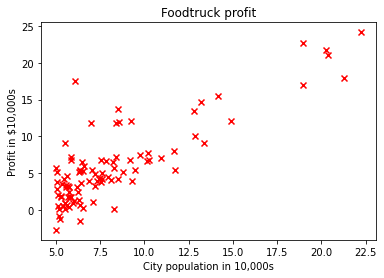

In [3]:
# read the data from the CSV file
data = np.genfromtxt('ex1data1.txt', delimiter=',')

# features matrix X: take the first column (index 0) of the dataset
# (the third 'None' parameter ensures the result is 2D array (our convention for X_data) instead of a 1D array)
X_data = data[:, 0, None]

# result vector y: take the last column of the dataset
y = data[:, -1]

# Task 2: implement plotData.py
plotData(X_data, y)

## Part 2: Gradient descent

In [4]:
# initialize parameters

# number of data examples
m = data.shape[0]

# Create the 'design matrix' X by adding a column of ones to the front of X
X = np.append( np.ones((m,1)), X_data, axis=1)

# initialize fitting parameters  
testTheta = np.zeros(2)

### Part 2a: Cost function

<u>Task 3</u>: implement computeCost.py

In [5]:
# Testing the cost function with theta = [0, 0] 
# Task: implement the computeCost function which is defined in the separate .py file
J = computeCost(X, y, testTheta);
J

32.072733877455676

_(expected cost value (approx) 32.07)_

In [6]:
# Testing the cost function with theta = [-1, 2]
# https://numpy.org/doc/stable/reference/generated/numpy.array.html
testTheta = np.array([-1, 2])
J = computeCost(X, y, testTheta)
J

54.24245508201238

_(expected cost value (approx) 54.24)_

### Part 2b: Gradient descent

<u>Task 4</u>: implement gradientDescent.py

In [7]:
# Some gradient descent settings
iterations = 1500
alpha = 0.01

# initialize fitting parameters
theta = np.zeros(2)

In [8]:
# Now run gradient descent
# Task 3: implement the gradientDescent.py
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
theta, J_history

(array([-3.63029144,  1.16636235]),
 array([[32.07273388],
        [ 6.73719046],
        [ 5.93159357],
        ...,
        [ 4.4834581 ],
        [ 4.48343473],
        [ 4.48341145]]))

_(expected theta values (approx): -3.6303, 1.1664)_

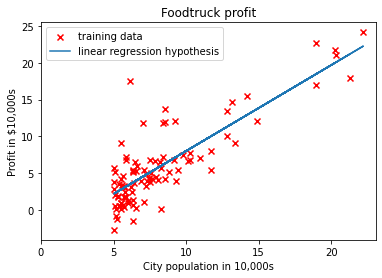

In [9]:
# Plot the linear fit
plt.title("Foodtruck profit")
plt.xlabel("City population in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.scatter(X_data, y, marker="x", color="red", label="training data") # input data
plt.plot(X_data, X @ theta, '-', label="linear regression hypothesis") # linear regression hypothesis
plt.xlim(xmin=0) # start x-axis at 0
plt.legend()
plt.show()

In [10]:
# Predict foodtruck profit for population sizes of 35,000
predict1 = np.array([1, 3.5]) @ theta
(predict1*10000)

4519.767867701763

In [11]:
# Predict foodtruck profit for population size of 70,000
predict2 = np.array([1, 7]) @ theta
(predict2*10000)

45342.450129447134

## Part 3: Debugging

*no tasks*

## Part 4: Visualising J(theta)

*no tasks*

### Surface plot

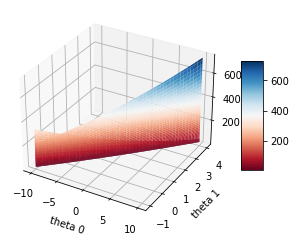

In [12]:
# Grid over which we will calculate 
# (linspace: Return a row vector with n linearly spaced elements between base and limit.)
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i in range(0, theta0_vals.shape[0]):
    for j in range(0, theta1_vals.shape[0]):
        t = np.array( [ [theta0_vals[i]], [theta1_vals[j]] ] )
        J_vals[i,j] = computeCost(X, y, t)
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T    

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('cost')
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap=plt.cm.RdBu ,
                       linewidth=0, antialiased=True)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# plt.gca().invert_xaxis()            # does not produce the desired effect
# ax.set_xlim(ax.get_xlim()[::-1])    # does not product the desired effect

plt.show()

### Contour plot

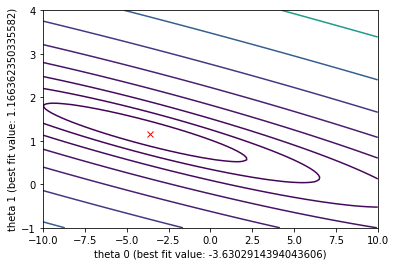

In [13]:
# label axes
ax = plt.gca()
ax.set_xlabel('theta 0 (best fit value: ' + str(theta[0]) + ')')
ax.set_ylabel('theta 1 (best fit value: ' + str(theta[1]) + ')')

# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
l = np.logspace(-2, 3, 20)  #Return numbers spaced evenly on a log scale.
plt.contour(theta0_vals, theta1_vals, J_vals, levels=l)
# mark theta
plt.plot(theta[0], theta[1], marker="x", color="red");
plt.show()